In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

strengthOfSchedule = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/sos/1999.csv', index_col=0)
strengthOfSchedule.index = strengthOfSchedule.index.rename('Team')
#print(strengthOfSchedule.head())

weeklyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week1.csv')
#print(weeklyStats.head())

yearlyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv')
#print(yearlyStats.head())

In [2]:
weekYearDf = pd.DataFrame()
tempYearDf = pd.DataFrame()
for years in range(1999, 2020):
    for weeks in range(1, 16):
        readFile = ("https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/" + str(years) + "/week" + str(weeks) + ".csv")
        weeklyDf = pd.read_csv(readFile)
        weeklyDf.drop(['Int', 'PassingAtt', 'Cmp', 'RushingAtt', 'PassingTD',
                          'RushingTD', 'Rec', 'Tgt', 'ReceivingTD', 'FL',
                          'PPRFantasyPoints', 'HalfPPRFantasyPoints'], axis = 1, inplace=True)

        weeklyDf['Week'] = weeks
        tempYearDf = pd.concat([tempYearDf,weeklyDf])
        
    tempYearDf['Year'] = years
    weekYearDf = pd.concat([weekYearDf,tempYearDf])

#print(weekYearDf.tail())

QB_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'QB']
#print(weekYearDf['Year'])

RB_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'RB']
#print(RB_weekYearDf.head())

WR_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'WR']
#print(WR_weekYearDf.head())

Text(0, 0.5, 'Annual Fantasy Points')

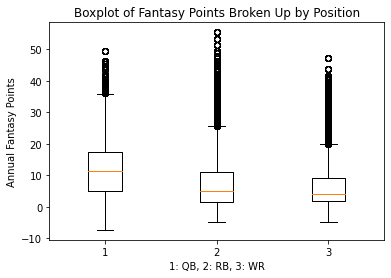

In [3]:
plt.boxplot([QB_weekYearDf['StandardFantasyPoints'],RB_weekYearDf['StandardFantasyPoints'], WR_weekYearDf['StandardFantasyPoints']])
plt.title('Boxplot of Fantasy Points Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Fantasy Points')

Text(0, 0.5, 'Annual Yards')

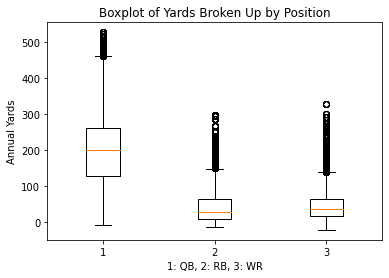

In [4]:
plt.boxplot([QB_weekYearDf['PassingYds'],RB_weekYearDf['RushingYds'], WR_weekYearDf['ReceivingYds']])
plt.title('Boxplot of Yards Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Yards')

Text(0, 0.5, 'Number of Players in Each Bucket')

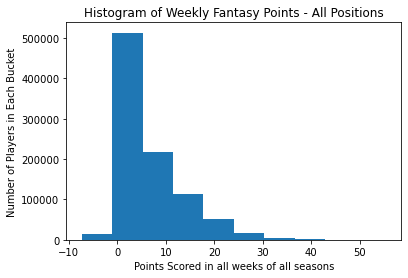

In [5]:
plt.hist(weekYearDf['StandardFantasyPoints'])
plt.title('Histogram of Weekly Fantasy Points - All Positions')
plt.xlabel('Points Scored in all weeks of all seasons')
plt.ylabel('Number of Players in Each Bucket')

In [19]:
meanTempDf = pd.DataFrame()
QBweekList = []
RBweekList = []
WRweekList = []
for years in range(1999, 2020):
    tempQByearDf = QB_weekYearDf.loc[QB_weekYearDf['Year'] == years]
    tempRByearDf = RB_weekYearDf.loc[RB_weekYearDf['Year'] == years]
    tempWRyearDf = WR_weekYearDf.loc[WR_weekYearDf['Year'] == years]
    for weeks in range(1, 16):
        tempQBDf = tempQByearDf.loc[tempQByearDf['Week'] == weeks]
        tempRBDf = tempRByearDf.loc[tempRByearDf['Week'] == weeks]
        tempWRDf = tempWRyearDf.loc[tempWRyearDf['Week'] == weeks]

        QBweekList.append(tempQBDf['StandardFantasyPoints'].mean())
        RBweekList.append(tempRBDf['StandardFantasyPoints'].mean())
        WRweekList.append(tempWRDf['StandardFantasyPoints'].mean())
    
meanTempDf['QB'] = QBweekList
meanTempDf['RB'] = RBweekList
meanTempDf['WR'] = WRweekList
weekCount = []
for x in range(0, len(meanTempDf.index)):
    weekCount.append(x)
print(meanTempDf)

            QB        RB        WR
0    10.333171  6.987302  7.262887
1     9.565641  6.846769  5.700000
2    10.072571  8.159615  5.280723
3     9.594000  5.767742  6.702198
4    11.546875  5.439655  6.860227
..         ...       ...       ...
310  12.384076  7.179074  6.057861
311  12.658753  7.197316  6.217265
312  12.085254  7.472129  6.032913
313  11.704508  7.526389  5.900949
314  11.875645  7.582410  5.998681

[315 rows x 3 columns]


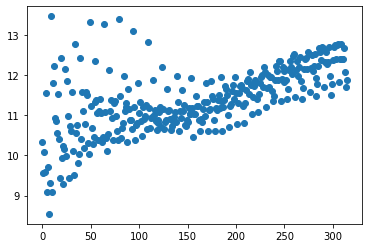

In [21]:
#plt.boxplot([meanTempDf['QB'],meanTempDf['RB'], meanTempDf['WR']])
#plt.title('Mean of Points Broken Up by Position')
#plt.xlabel('1: QB, 2: RB, 3: WR')
#plt.ylabel('Standard Fantasy Points')
plt.scatter(weekCount, meanTempDf['QB'])

#Weeks is x axis and points is y axis